# **Análisis Predictivo y Descriptivo del Impacto de Factores Demográficos y Económicos en los Niveles de Ingresos en Canadá**

**DATA VALUES**

https://www150.statcan.gc.ca/n1/pub/75f0026x/2013000/t03200-eng.htm?utm_source=chatgpt.com#immst15

immst15 -- Flag - Person is an immigrant

Type and length: Character(1)

Description: Flag to indicate whether a person is an immigrant. 

    For the Public Use Microdata File only: The immigration status is available only for persons living in an urban size of 500,000 persons and more. 
    All other persons have a value of '7' (don’t know).

Population: Persons aged 16 or older

Range and codes:

    1 : Yes
    2 : No
    6 : Interim Processing Code
    7 : Don't Know
    8 : Refusal
    9 : Not Applicable

Gender classification -> https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1326727

**CIS Dataset Dictionary**

- PERSONID -> Unique identifier for each individual in the dataset.
- Weight -> Survey weight assigned to each individual to adjust for sampling representation.
- Province -> The province in which the individual resides.
- MBMREGP -> Market Basket Measure Region Code, used for assessing poverty levels.
- Age_gap -> Age category or age gap classification of the individual.
- Gender -> Gender of the individual (e.g., Male, Female, Other).
- Marital_status -> Gender of the individual (e.g., Male, Female, Other).
- Highschool -> Indicates whether the individual has completed high school (Yes/No).
- Highest_edu -> The highest level of education attained by the individual.
- Work_ref -> Employment status reference (e.g., Employed, Unemployed, Retired)
- Work_yearly -> Total number of years the individual has been employed.
- Emp_week_ref -> Number of weeks worked in a reference period.
- Total_hour_ref -> Total hours worked in the reference period.
- paid_emp__ref -> Number of weeks worked as a paid employee.
- self_emp_ref -> Number of weeks worked as a self-employed individual.
- Immigrant -> Indicates whether the individual is an immigrant (Yes/No).
- Year_immigrant -> The year the individual immigrated to the country.
- income_after_tax -> The individual's total income after taxes.
- Cap_gain -> Capital gains earned by the individual.
- Childcare_expe -> Total expenses incurred for childcare.
- Child_benefit -> Government benefits received for childcare.
- CPP_QPP -> Canada Pension Plan (CPP) or Quebec Pension Plan (QPP) contributions.
- Earning -> Total earnings of the individual before deductions.
- Guaranteed_income -> Guaranteed income supplement received.
- Investment -> Total investment income of the individual.
- Old_age_pension -> Old Age Security (OAS) pension received.
- Private_pension -> Private pension plan contributions.
- Self_emp_income -> Income earned through self-employment.
- Pension -> Total pension income received from various sources.
- Total_income -> Sum of all income sources before deductions.
- Emp_insurance -> Employment insurance benefits received.
- Salary_wages -> Salary and wages earned from employment.
- compensation -> Any compensation received due to work-related matters.
- Family_mem -> Number of family members in the household.
- CFCOMP -> Family composition classification.
- CONDMP -> Type of dwelling or housing condition.
- RENTM -> Monthly rent paid for housing.

# Paso 1: definición del problema.
## Este proyecto tiene el potencial de ofrecer insights valiosos para diseñar políticas públicas, programas sociales y estrategias individuales para mejorar la movilidad económica
## Objetivos
- Objetivo General:
  Analizar y predecir los factores clave que influyen en los niveles de ingresos y el bienestar 
financiero en Canadá.
- Objetivos Específicos:
  1. Identificar las variables más relevantes que afectan los ingresos mediante técnicas de selección 
de características.
  2. Predecir los ingresos individuales utilizando modelos de Machine Learning supervisado.
  3. Visualizar las desigualdades regionales y por grupo demográfico en el bienestar financiero.

Importación de las librerías necesarias

In [188]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Módulo para interactuar con el sistema operativo de forma sencilla:
import os


# Paso 2. Lectura de datos.


In [189]:
# Importamos el dataset público.

import kagglehub
pd.options.display.float_format = '{:,.2f}'.format
path = kagglehub.dataset_download("aradhanahirapara/income-survey-finance-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\fgdel\.cache\kagglehub\datasets\aradhanahirapara\income-survey-finance-analysis\versions\1


In [190]:
# Lista los archivos en la ruta

files = os.listdir(path)
print("Archivos en el dataset:", files)


Archivos en el dataset: ['Income Survey Dataset.csv', 'Income_Dataset_Dictionary.docx']


In [191]:
# Cargar el archivo CSV en un DataFrame

dataset_path = os.path.join(path, "Income Survey Dataset.csv")
data = pd.read_csv(dataset_path)
data.head()


,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.65,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.10,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.10,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.10,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.10,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


# Paso 3. Exploración y limpieza de datos.
## Paso 3.1 Comprensión de las características.

In [192]:
# Recurrimos al atributo shape para describir la información que contiene:
print (f" El conjunto de datos cuenta con información de {data.shape[0]} voluntarios, con un total de {data.shape[1]} datos característicos de cada uno de ellos.")

 El conjunto de datos cuenta con información de 72643 voluntarios, con un total de 38 datos característicos de cada uno de ellos.


## Paso 3.2 Identificación de valores duplicados y nulos.

In [193]:
# Información sobre las columnas
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_immigrant     726

- En este punto conocemos que todas las variables son numéricas y por exigencias del proyecto transformaremos una de estas variables ("Province") a categórica.
- También conocemos que no existen valores nulos

In [194]:
# Se utiliza el método .duplicated() para identificar los valores repetidos dentro del DataFrame:
print(f" Hay un total de {data.duplicated().sum()} valores duplicados.")

 Hay un total de 0 valores duplicados.


In [195]:
# Resumen estadístico de las columnas numéricas
print(data.describe())


       PersonID    Weight  Province   MBMREGP   Age_gap    Gender  \
count 72,643.00 72,643.00 72,643.00 72,643.00 72,643.00 72,643.00   
mean  36,322.00    507.02     34.77     20.43      9.04      1.51   
std   20,970.37    622.31     14.63     10.76      4.50      0.50   
min        1.00     10.86     10.00      1.00      1.00      1.00   
25%   18,161.50    151.94     24.00     13.00      5.00      1.00   
50%   36,322.00    283.11     35.00     19.00     10.00      2.00   
75%   54,482.50    605.35     47.00     28.00     13.00      2.00   
max   72,643.00  8,863.96     59.00     40.00     15.00      2.00   

       Marital_status  Highschool  Highest_edu  Work_ref  ...    Pension  \
count       72,643.00   72,643.00    72,643.00 72,643.00  ...  72,643.00   
mean            21.93        2.31         3.53      2.17  ...   7,665.03   
std             38.49        2.26         1.86      1.83  ...  19,847.70   
min              1.00        1.00         1.00      1.00  ...       0.00  

Gender classification -> https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=1326727

In [196]:
gender_summary = data.groupby('Gender')[['income_after_tax', 'Salary_wages', 'Work_yearly', 'Total_hour_ref']].mean()
print(gender_summary)

        income_after_tax  Salary_wages  Work_yearly  Total_hour_ref
Gender                                                             
1          18,325,773.52     80,291.77        35.46        5,334.19
2          17,089,163.44     75,359.10        35.79        5,695.06


In [197]:
data["Highschool"].value_counts()

Highschool
1    46678
6    12828
2    10566
9     2571
Name: count, dtype: int64

### Modificamos la columna "Province" de numérica a categórica

In [198]:
# Transformamos la variable numérica "Province" a categórica.

# ESTO LO PASAMOS AL INICIO COMO INTRODUCCIÓN APROVECHANDO EL MAPEO SOLO A TÍTULO DE EXPLICACIÓN DE QUE SIGNIFICA CADA VALOR NUMÉRICO EN ESTA VARIABLE
"""
valores = data["Province"].unique().tolist()

print(valores)

# Creamos un diccionario de mapeo:
mapeo = {
    10: "Newfoundland and Labrador",
    11: "Prince Edward Island",
    12: "Nova Scotia",
    13: "New Brunswick",
    24: "Quebec",
    35: "Ontario",
    46: "Manitoba",
    47: "Saskatchewan",
    48: "Alberta",
    59: "British Columbia"
}

# Reemplazamos los números en la columna por los nombres
data["Province_c"] = data["Province"].replace(mapeo)

print(data["Province_c"])
"""

'\nvalores = data["Province"].unique().tolist()\n\nprint(valores)\n\n# Creamos un diccionario de mapeo:\nmapeo = {\n    10: "Newfoundland and Labrador",\n    11: "Prince Edward Island",\n    12: "Nova Scotia",\n    13: "New Brunswick",\n    24: "Quebec",\n    35: "Ontario",\n    46: "Manitoba",\n    47: "Saskatchewan",\n    48: "Alberta",\n    59: "British Columbia"\n}\n\n# Reemplazamos los números en la columna por los nombres\ndata["Province_c"] = data["Province"].replace(mapeo)\n\nprint(data["Province_c"])\n'

## Paso 4. Análisis de correlación de variables

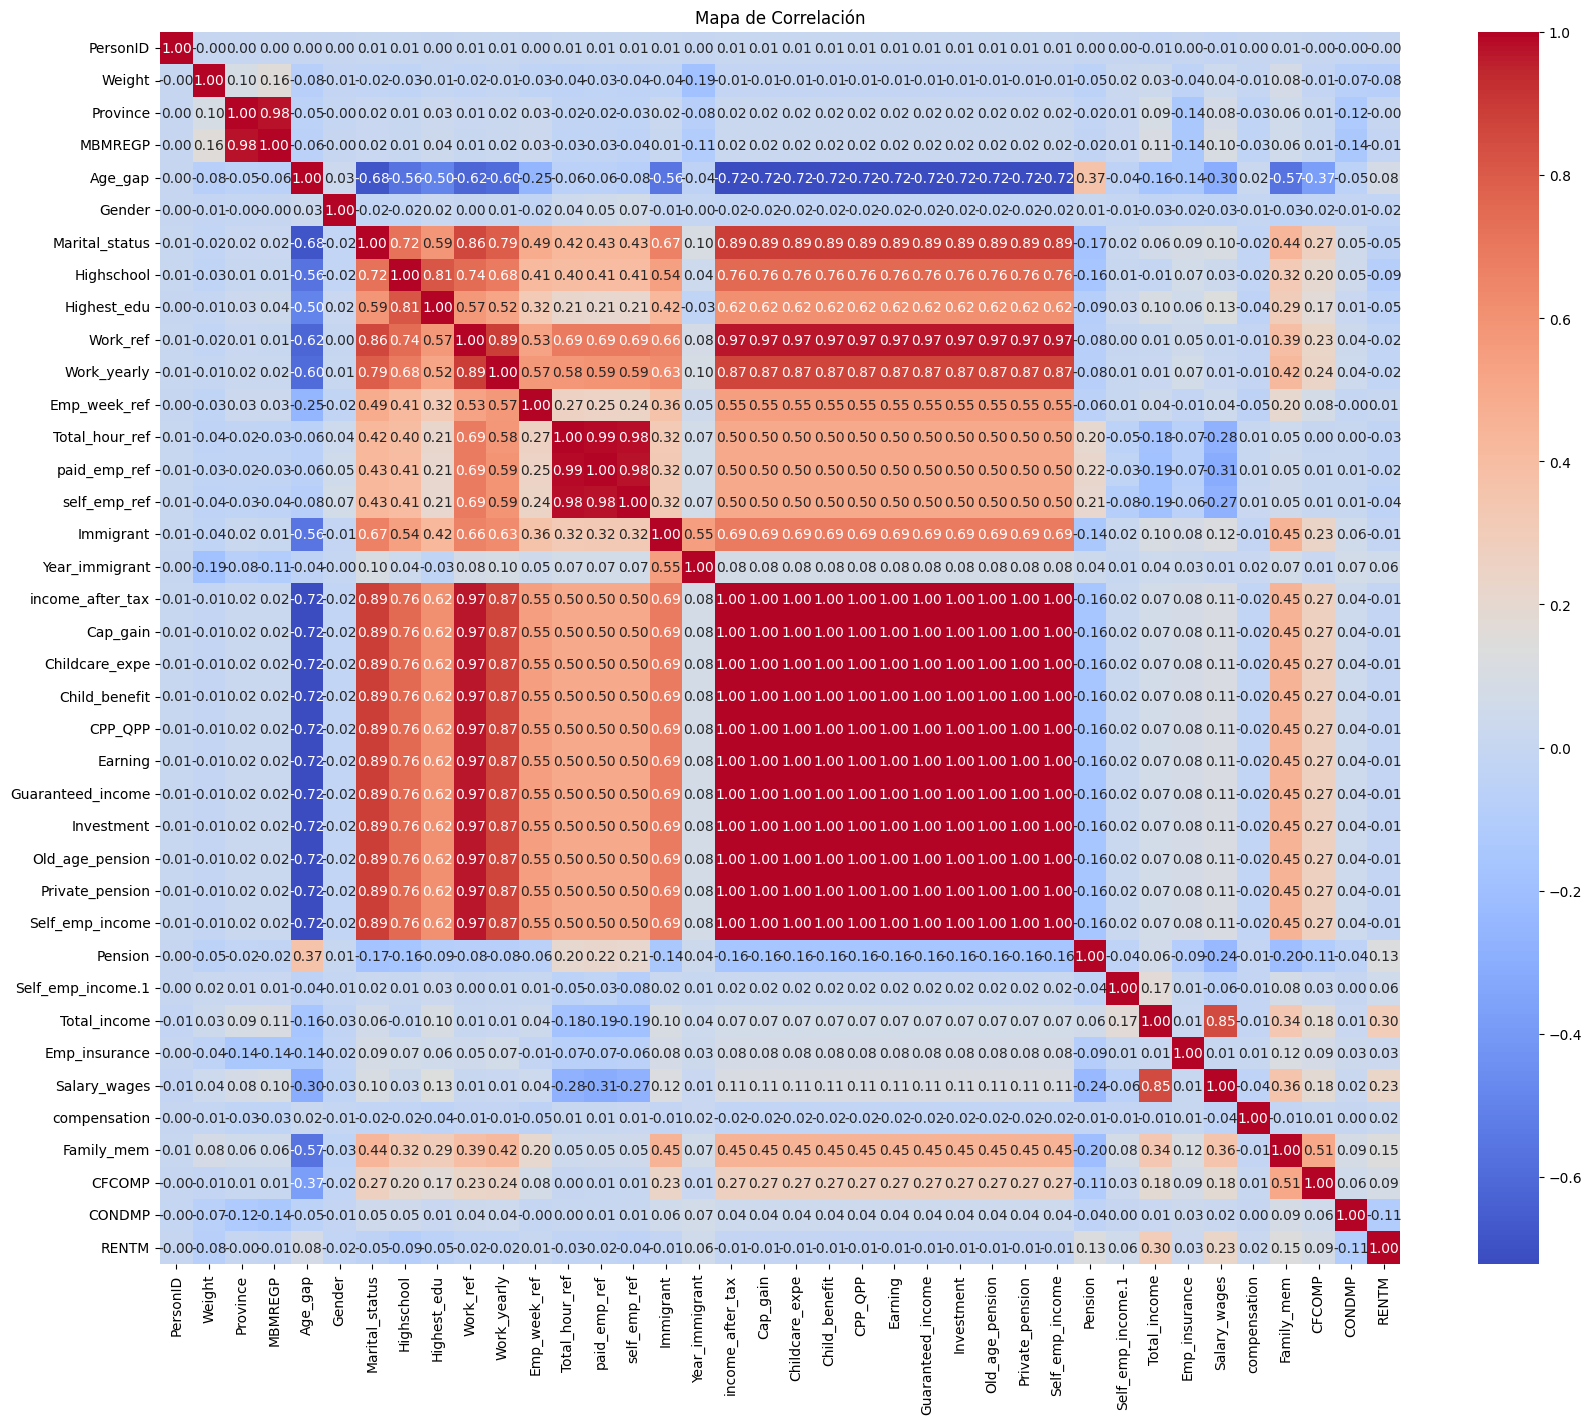

In [199]:
# Nuestra variable target sería "income_after_tax"

# Calculamos las correlaciones
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()


## Paso 4 Análisis de Variables Categóricas y Numéricas

In [200]:
# Separar columnas numéricas y categóricas
num_cols = data.select_dtypes(include=["number"]).columns
cat_cols = data.select_dtypes(exclude=["number"]).columns

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: Index(['PersonID', 'Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender',
       'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref',
       'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref',
       'self_emp_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Cap_gain', 'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Earning',
       'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension',
       'Self_emp_income', 'Pension', 'Self_emp_income.1', 'Total_income',
       'Emp_insurance', 'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP',
       'CONDMP', 'RENTM'],
      dtype='object')
Variables categóricas: Index([], dtype='object')


In [201]:
# Ver distribución de categorías en cada variable categórica
for col in cat_cols:
    print(f"\nDistribución de {col}:")
    print(data[col].value_counts(normalize=True) * 100)  # En porcentaje

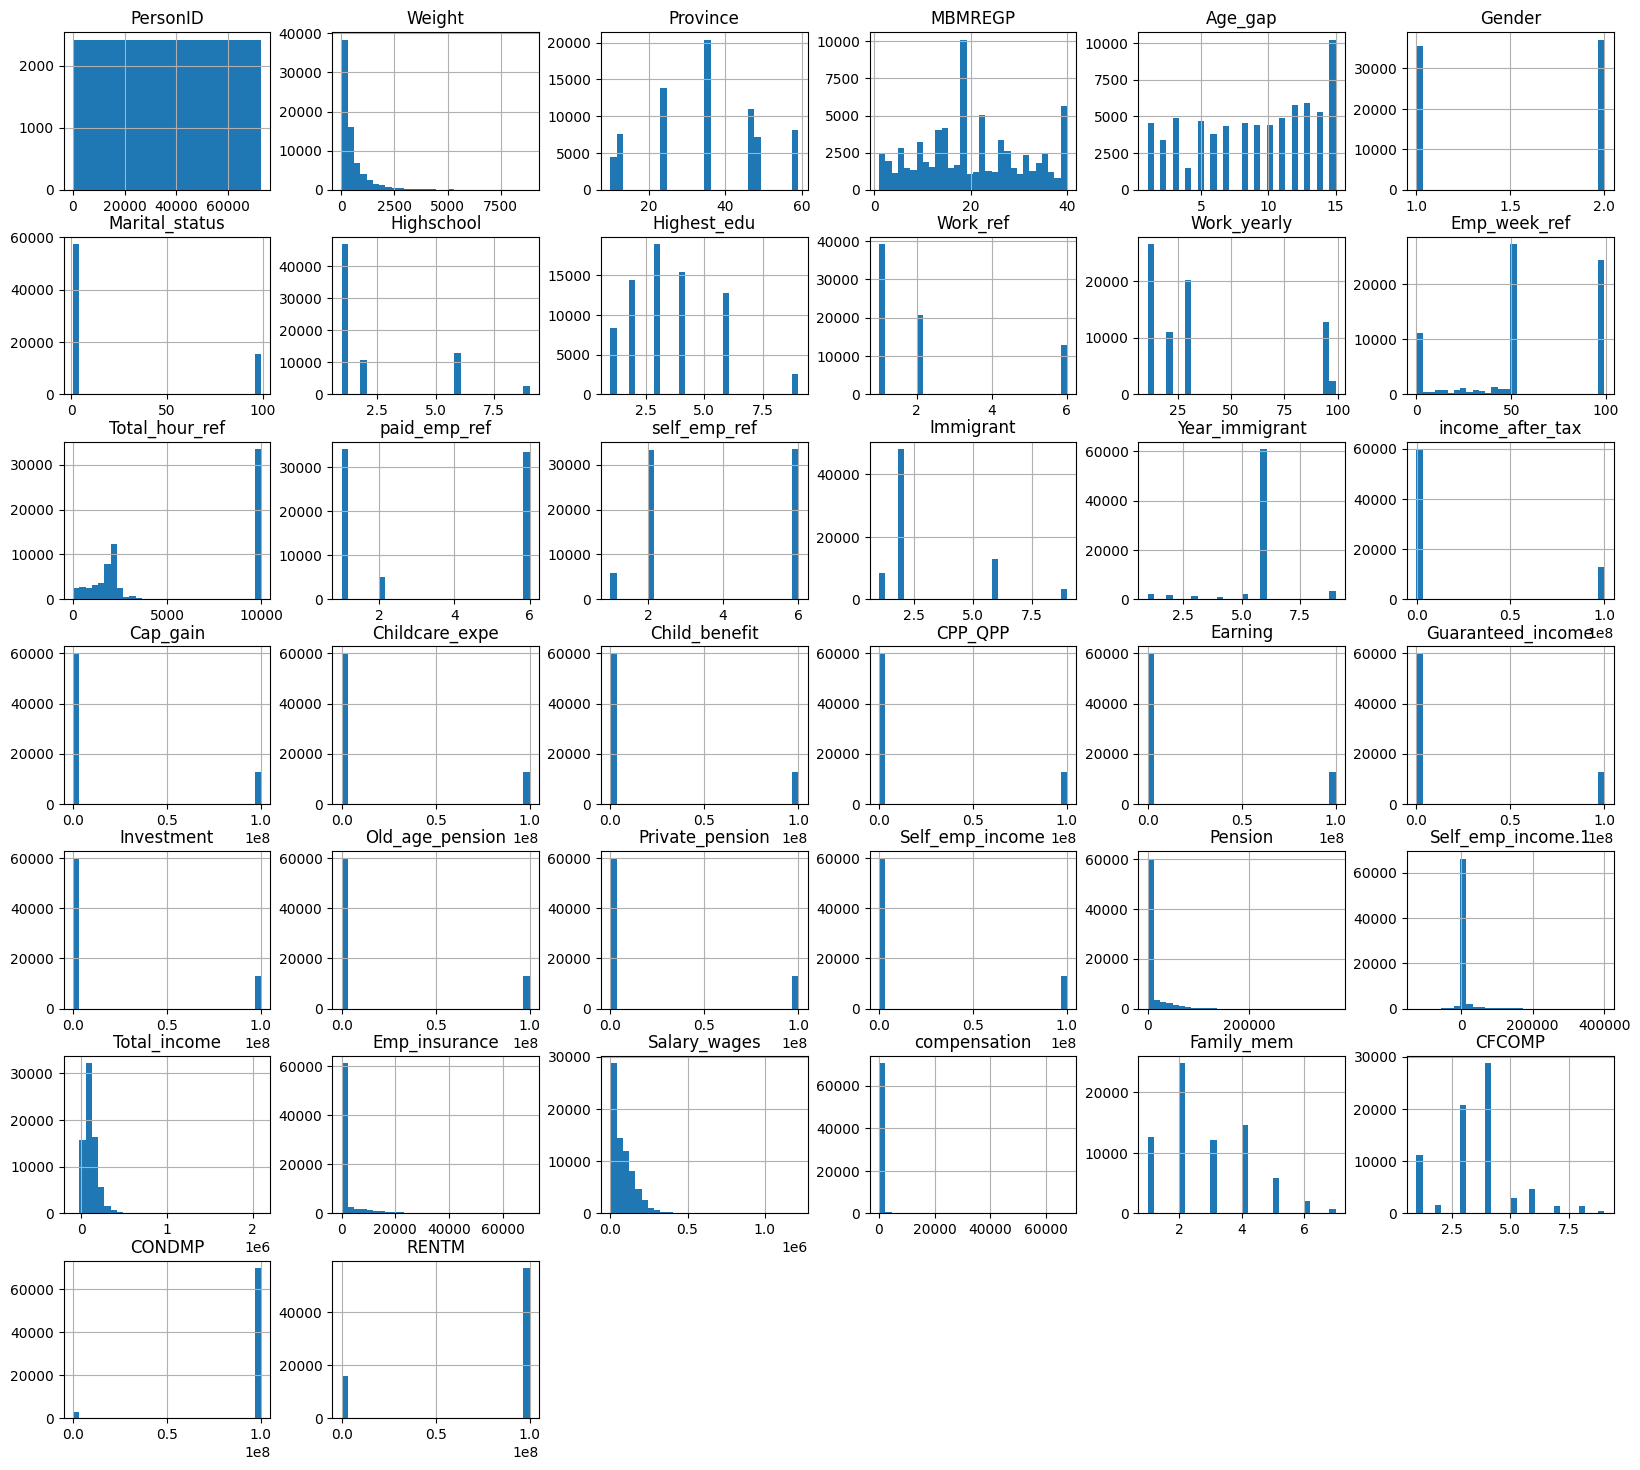

In [202]:
# Histograma de variables numéricas
data[num_cols].hist(figsize=(20, 18), bins=30)
plt.show()

In [203]:
# Visualizar los nombres de las columnas
print(data.columns)

Index(['PersonID', 'Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender',
       'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref',
       'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref',
       'self_emp_ref', 'Immigrant', 'Year_immigrant', 'income_after_tax',
       'Cap_gain', 'Childcare_expe', 'Child_benefit', 'CPP_QPP', 'Earning',
       'Guaranteed_income', 'Investment', 'Old_age_pension', 'Private_pension',
       'Self_emp_income', 'Pension', 'Self_emp_income.1', 'Total_income',
       'Emp_insurance', 'Salary_wages', 'compensation', 'Family_mem', 'CFCOMP',
       'CONDMP', 'RENTM'],
      dtype='object')


**VIF CHECK**

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_df = data.select_dtypes(include=[np.number]).drop(columns=['PersonID', 'Weight'])  # IDs & survey weight

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

              Feature           VIF
7            Work_ref      2,166.31
12       self_emp_ref        272.94
11       paid_emp_ref        259.36
10     Total_hour_ref        211.81
0            Province        152.17
1             MBMREGP        107.52
14     Year_immigrant         42.86
28       Total_income         35.66
30       Salary_wages         25.63
2             Age_gap         24.95
6         Highest_edu         16.88
8         Work_yearly         13.74
13          Immigrant         12.14
3              Gender         11.57
32         Family_mem         11.38
5          Highschool         10.50
33             CFCOMP          8.76
9        Emp_week_ref          8.38
4      Marital_status          6.96
26            Pension          5.68
27  Self_emp_income.1          2.47
29      Emp_insurance          1.25
31       compensation          1.05
35              RENTM         -0.06
34             CONDMP         -0.07
20            Earning    -75,194.98
15   income_after_tax   -136

**COLUMN DROPPING**

In [205]:
columns_to_drop = ['PersonID', 'Weight', 'Pension', 'Total_income', 'Work_yearly', 'Emp_week_ref', 
                   'Total_hour_ref', 'paid_emp_ref', 'self_emp_ref', 'CPP_QPP', 'Guaranteed_income',
                   'Old_age_pension', 'Private_pension', 'Self_emp_income', 'Earning',
                   'Child_benefit', 'Childcare_expe', 'Cap_gain', 'Investment']

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,Year_immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,59,38,15,2,3,1,3,2,2,6,20275,0,0,0,0,1,1,99999996,99999996
1,35,17,9,1,1,1,2,1,2,6,61680,0,0,106000,0,4,4,99999996,99999996
2,35,17,9,2,1,1,3,1,2,6,26875,0,0,106000,0,4,4,99999996,99999996
3,35,17,4,1,4,2,1,1,2,6,14000,0,0,106000,0,4,4,99999996,99999996
4,35,17,3,1,96,6,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


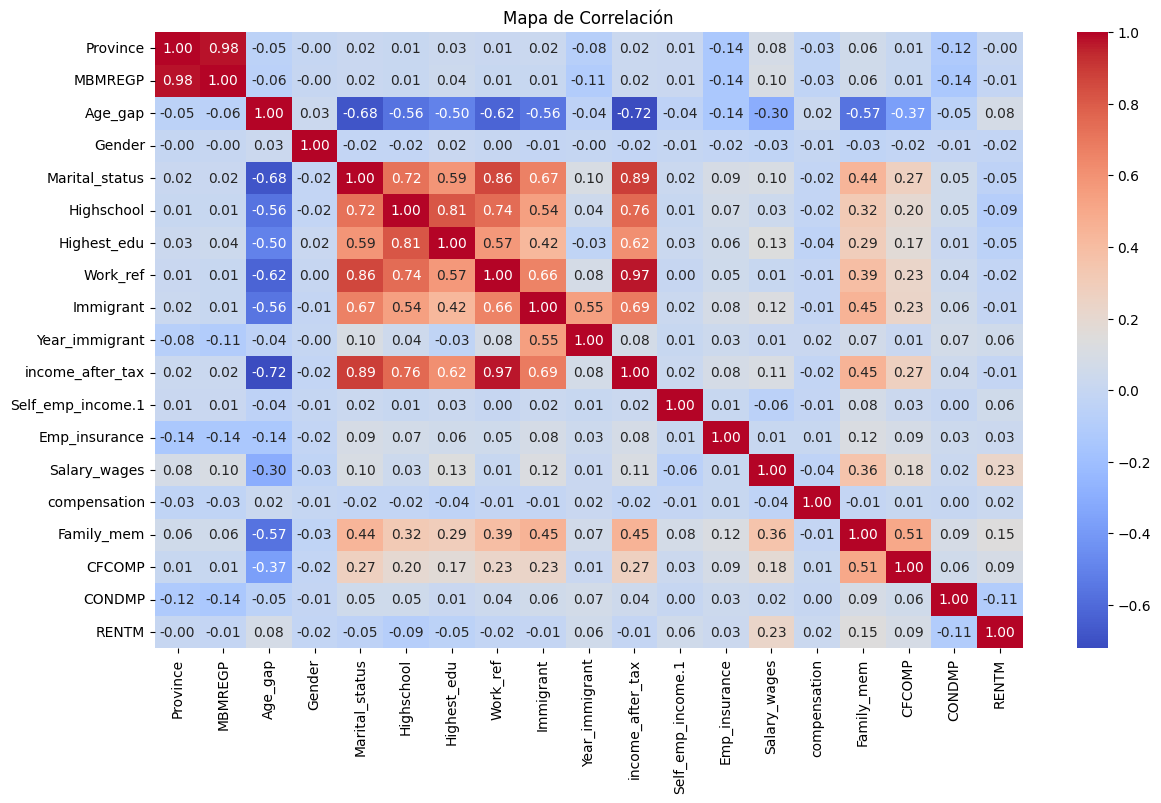

In [206]:
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

In [207]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature    VIF
0            Province 149.44
1             MBMREGP 106.85
7            Work_ref  62.69
9      Year_immigrant  33.90
2             Age_gap  15.25
6         Highest_edu  13.80
8           Immigrant  11.24
15         Family_mem   9.92
3              Gender   9.58
5          Highschool   9.56
16             CFCOMP   8.09
4      Marital_status   6.91
13       Salary_wages   2.78
12      Emp_insurance   1.18
11  Self_emp_income.1   1.07
14       compensation   1.02
18              RENTM  -0.06
17             CONDMP  -0.06
10   income_after_tax  -0.30


In [208]:
columns_to_drop = ["Province"]

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,Year_immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,6,20275,0,0,0,0,1,1,99999996,99999996
1,17,9,1,1,1,2,1,2,6,61680,0,0,106000,0,4,4,99999996,99999996
2,17,9,2,1,1,3,1,2,6,26875,0,0,106000,0,4,4,99999996,99999996
3,17,4,1,4,2,1,1,2,6,14000,0,0,106000,0,4,4,99999996,99999996
4,17,3,1,96,6,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [209]:
columns_to_drop = ["Year_immigrant"]

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,20275,0,0,0,0,1,1,99999996,99999996
1,17,9,1,1,1,2,1,2,61680,0,0,106000,0,4,4,99999996,99999996
2,17,9,2,1,1,3,1,2,26875,0,0,106000,0,4,4,99999996,99999996
3,17,4,1,4,2,1,1,2,14000,0,0,106000,0,4,4,99999996,99999996
4,17,3,1,96,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [210]:
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

              Feature   VIF
6            Work_ref 61.73
1             Age_gap 14.46
5         Highest_edu 13.79
13         Family_mem  9.86
4          Highschool  9.55
2              Gender  9.37
14             CFCOMP  8.01
3      Marital_status  6.90
7           Immigrant  5.97
0             MBMREGP  4.44
11       Salary_wages  2.75
10      Emp_insurance  1.18
9   Self_emp_income.1  1.07
12       compensation  1.02
15             CONDMP -0.05
16              RENTM -0.05
8    income_after_tax -0.29


7           Immigrant   5.974188
0             MBMREGP   4.444691
11       Salary_wages   2.747508
10      Emp_insurance   1.179334
9   Self_emp_income.1   1.073235
12       compensation   1.023433
15             CONDMP  -0.047846
16              RENTM  -0.054835
8    income_after_tax  -0.285091

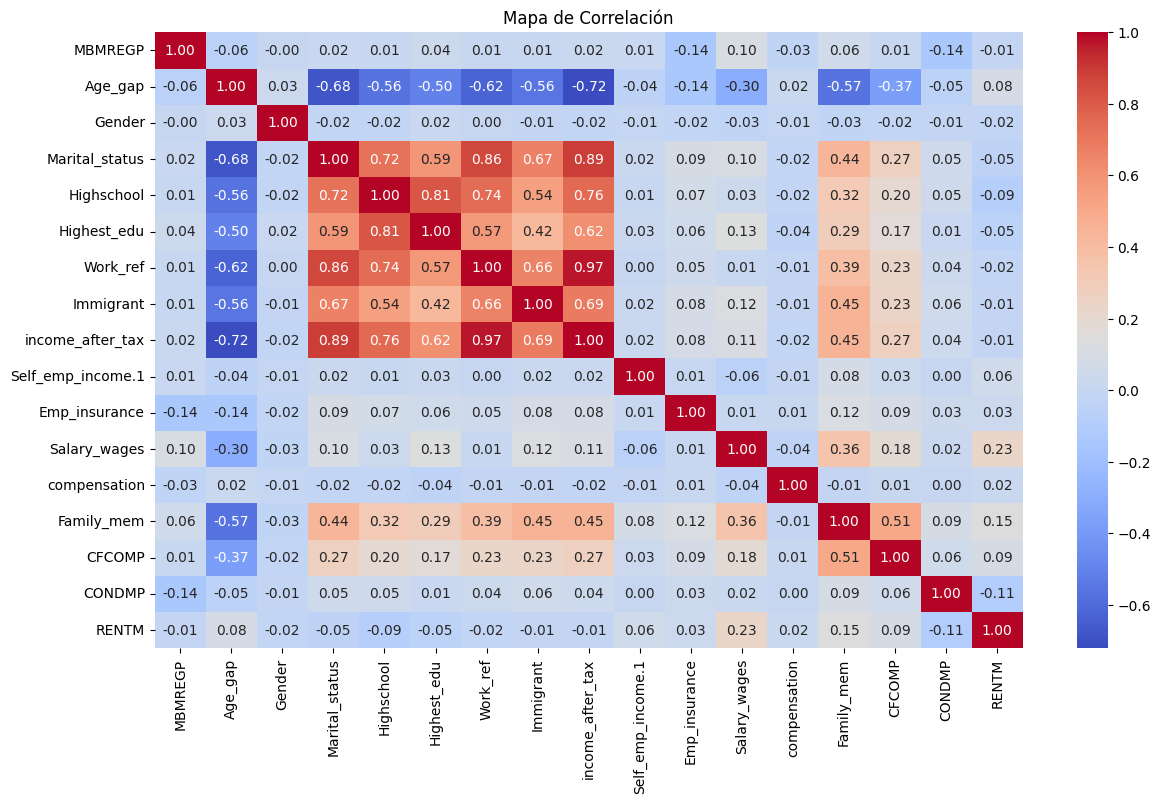

In [211]:
correlation_matrix = data.corr()

# Generamos el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

In [212]:
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,20275,0,0,0,0,1,1,99999996,99999996
1,17,9,1,1,1,2,1,2,61680,0,0,106000,0,4,4,99999996,99999996
2,17,9,2,1,1,3,1,2,26875,0,0,106000,0,4,4,99999996,99999996
3,17,4,1,4,2,1,1,2,14000,0,0,106000,0,4,4,99999996,99999996
4,17,3,1,96,6,6,6,6,99999996,0,0,106000,0,4,4,99999996,99999996


In [213]:
desc_immigrant = data["Immigrant"].describe()
val_count_immigrant = data["Immigrant"].value_counts()

print(f"Dato de la variable: \n {desc_immigrant} \n")
print(f"Valores: \n {val_count_immigrant}")

Dato de la variable: 
 count   72,643.00
mean         2.91
std          2.08
min          1.00
25%          2.00
50%          2.00
75%          2.00
max          9.00
Name: Immigrant, dtype: float64 

Valores: 
 Immigrant
2    48137
6    12828
1     8389
9     3289
Name: count, dtype: int64


In [214]:
desc_MBMREGP = data["MBMREGP"].describe()
val_count_MBMREGP = data["MBMREGP"].value_counts()

print(f"Dato de la variable: \n {desc_MBMREGP} \n")
print(f"Valores: \n {val_count_MBMREGP}")

Dato de la variable: 
 count   72,643.00
mean        20.43
std         10.76
min          1.00
25%         13.00
50%         19.00
75%         28.00
max         40.00
Name: MBMREGP, dtype: float64 

Valores: 
 MBMREGP
19    8098
23    4075
13    4050
26    3363
39    3311
15    2920
40    2338
10    2268
18    2026
3     1961
11    1860
35    1852
34    1773
17    1631
1     1602
12    1532
29    1460
7     1442
16    1438
28    1431
6     1430
5     1347
8     1330
31    1317
24    1283
33    1252
14    1232
25    1179
37    1179
27    1175
21    1175
4     1102
30    1083
20    1039
32    1009
9      978
22     933
2      831
38     816
36     522
Name: count, dtype: int64


In [215]:
desc_Salary_wages = data["Salary_wages"].describe()
val_count_Salary_wages = data["Salary_wages"].value_counts()

print(f"Dato de la variable: \n {desc_Salary_wages} \n")
print(f"Valores: \n {val_count_Salary_wages}")

Dato de la variable: 
 count      72,643.00
mean       77,770.53
std        81,093.49
min             0.00
25%         6,500.00
50%        62,500.00
75%       120,000.00
max     1,216,500.00
Name: Salary_wages, dtype: float64 

Valores: 
 Salary_wages
0         13960
65000       572
75000       524
55000       511
60000       486
          ...  
4325          2
16650         2
18875         2
105750        2
925000        1
Name: count, Length: 2484, dtype: int64


In [216]:
desc_Emp_insurance = data["Emp_insurance"].describe()
val_count_Emp_insurance = data["Emp_insurance"].value_counts()

print(f"Dato de la variable: \n {desc_Emp_insurance} \n")
print(f"Valores: \n {val_count_Emp_insurance}")

Dato de la variable: 
 count   72,643.00
mean     1,747.70
std      4,964.16
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     70,000.00
Name: Emp_insurance, dtype: float64 

Valores: 
 Emp_insurance
0        58921
5500       261
6000       228
5750       220
12500      211
         ...  
22100        2
48000        2
6800         2
30000        1
975          1
Name: count, Length: 438, dtype: int64


In [217]:
desc_Self_emp_income = data["Self_emp_income.1"].describe()
val_count_Self_emp_income = data["Self_emp_income.1"].value_counts()

print(f"Dato de la variable: \n {desc_Self_emp_income} \n")
print(f"Valores: \n {val_count_Self_emp_income}")

Dato de la variable: 
 count     72,643.00
mean       3,901.04
std       19,728.92
min     -125,000.00
25%            0.00
50%            0.00
75%            0.00
max      400,000.00
Name: Self_emp_income.1, dtype: float64 

Valores: 
 Self_emp_income.1
 0        58893
 11500      146
 24000      140
 5000       137
 13500      129
          ...  
 11325        2
 4775         2
 14250        2
 1075         1
-77500        1
Name: count, Length: 828, dtype: int64


In [218]:
desc_compensation = data["compensation"].describe()
val_count_compensation = data["compensation"].value_counts()

print(f"Dato de la variable: \n {desc_compensation} \n")
print(f"Valores: \n {val_count_compensation}")

Dato de la variable: 
 count   72,643.00
mean       427.95
std      3,126.16
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     67,500.00
Name: compensation, dtype: float64 

Valores: 
 compensation
0        69434
5750        57
3100        48
200         45
25000       43
         ...  
28750        2
13800        2
4000         2
1025         2
50000        1
Name: count, Length: 178, dtype: int64


In [219]:
desc_CONDMP = data["CONDMP"].describe()
val_count_CONDMP = data["CONDMP"].value_counts()

print(f"Dato de la variable: \n {desc_CONDMP} \n")
print(f"Valores: \n {val_count_CONDMP}")

Dato de la variable: 
 count       72,643.00
mean    96,248,788.52
std     19,001,387.72
min              0.00
25%     99,999,996.00
50%     99,999,996.00
75%     99,999,996.00
max     99,999,996.00
Name: CONDMP, dtype: float64 

Valores: 
 CONDMP
99999996    69918
350           394
400           389
300           388
250           278
200           200
150           155
450           152
600           130
100           129
500           115
550            78
700            68
650            43
800            38
0              35
850            25
50             24
750            16
1000           15
900            15
1700           10
950             7
1400            6
1600            4
1300            3
1250            2
1550            2
1450            2
1100            1
1200            1
Name: count, dtype: int64


In [220]:
desc_RENTM = data["RENTM"].describe()
val_count_RENTM = data["RENTM"].value_counts()

print(f"Dato de la variable: \n {desc_RENTM} \n")
print(f"Valores: \n {val_count_RENTM}")

Dato de la variable: 
 count       72,643.00
mean    77,904,496.58
std     41,489,030.40
min              0.00
25%     99,999,996.00
50%     99,999,996.00
75%     99,999,996.00
max     99,999,999.00
Name: RENTM, dtype: float64 

Valores: 
 RENTM
99999996    56526
1000         1467
800          1459
900          1437
700          1285
600          1217
1200         1174
1100         1038
500          1018
1300          773
1400          717
1500          673
400           527
1600          486
300           381
1700          362
0             330
2000          325
1800          276
1900          186
200           151
2200          133
2100          123
2800          103
100            88
2500           75
2400           71
99999999       66
2300           60
3000           49
2700           21
2600           21
3600           17
2900            6
3300            1
3400            1
Name: count, dtype: int64


In [221]:
desc_income_after_tax = data["income_after_tax"].describe()
val_count_income_after_tax = data["income_after_tax"].value_counts()

print(f"Dato de la variable: \n {desc_income_after_tax} \n")
print(f"Valores: \n {val_count_income_after_tax}")

Dato de la variable: 
 count       72,643.00
mean    17,693,705.29
std     38,116,287.33
min       -139,450.00
25%         22,775.00
50%         43,330.00
75%         83,660.00
max     99,999,996.00
Name: income_after_tax, dtype: float64 

Valores: 
 income_after_tax
99999996    12828
0            1043
5000           76
12500          60
8750           57
            ...  
16245           1
47935           1
205350          1
106215          1
77735           1
Name: count, Length: 17711, dtype: int64


PLOT

7           Immigrant  5.97
0             MBMREGP  4.44
11       Salary_wages  2.75
10      Emp_insurance  1.18
9   Self_emp_income.1  1.07
12       compensation  1.02
15             CONDMP -0.05
16              RENTM -0.05
8    income_after_tax -0.29

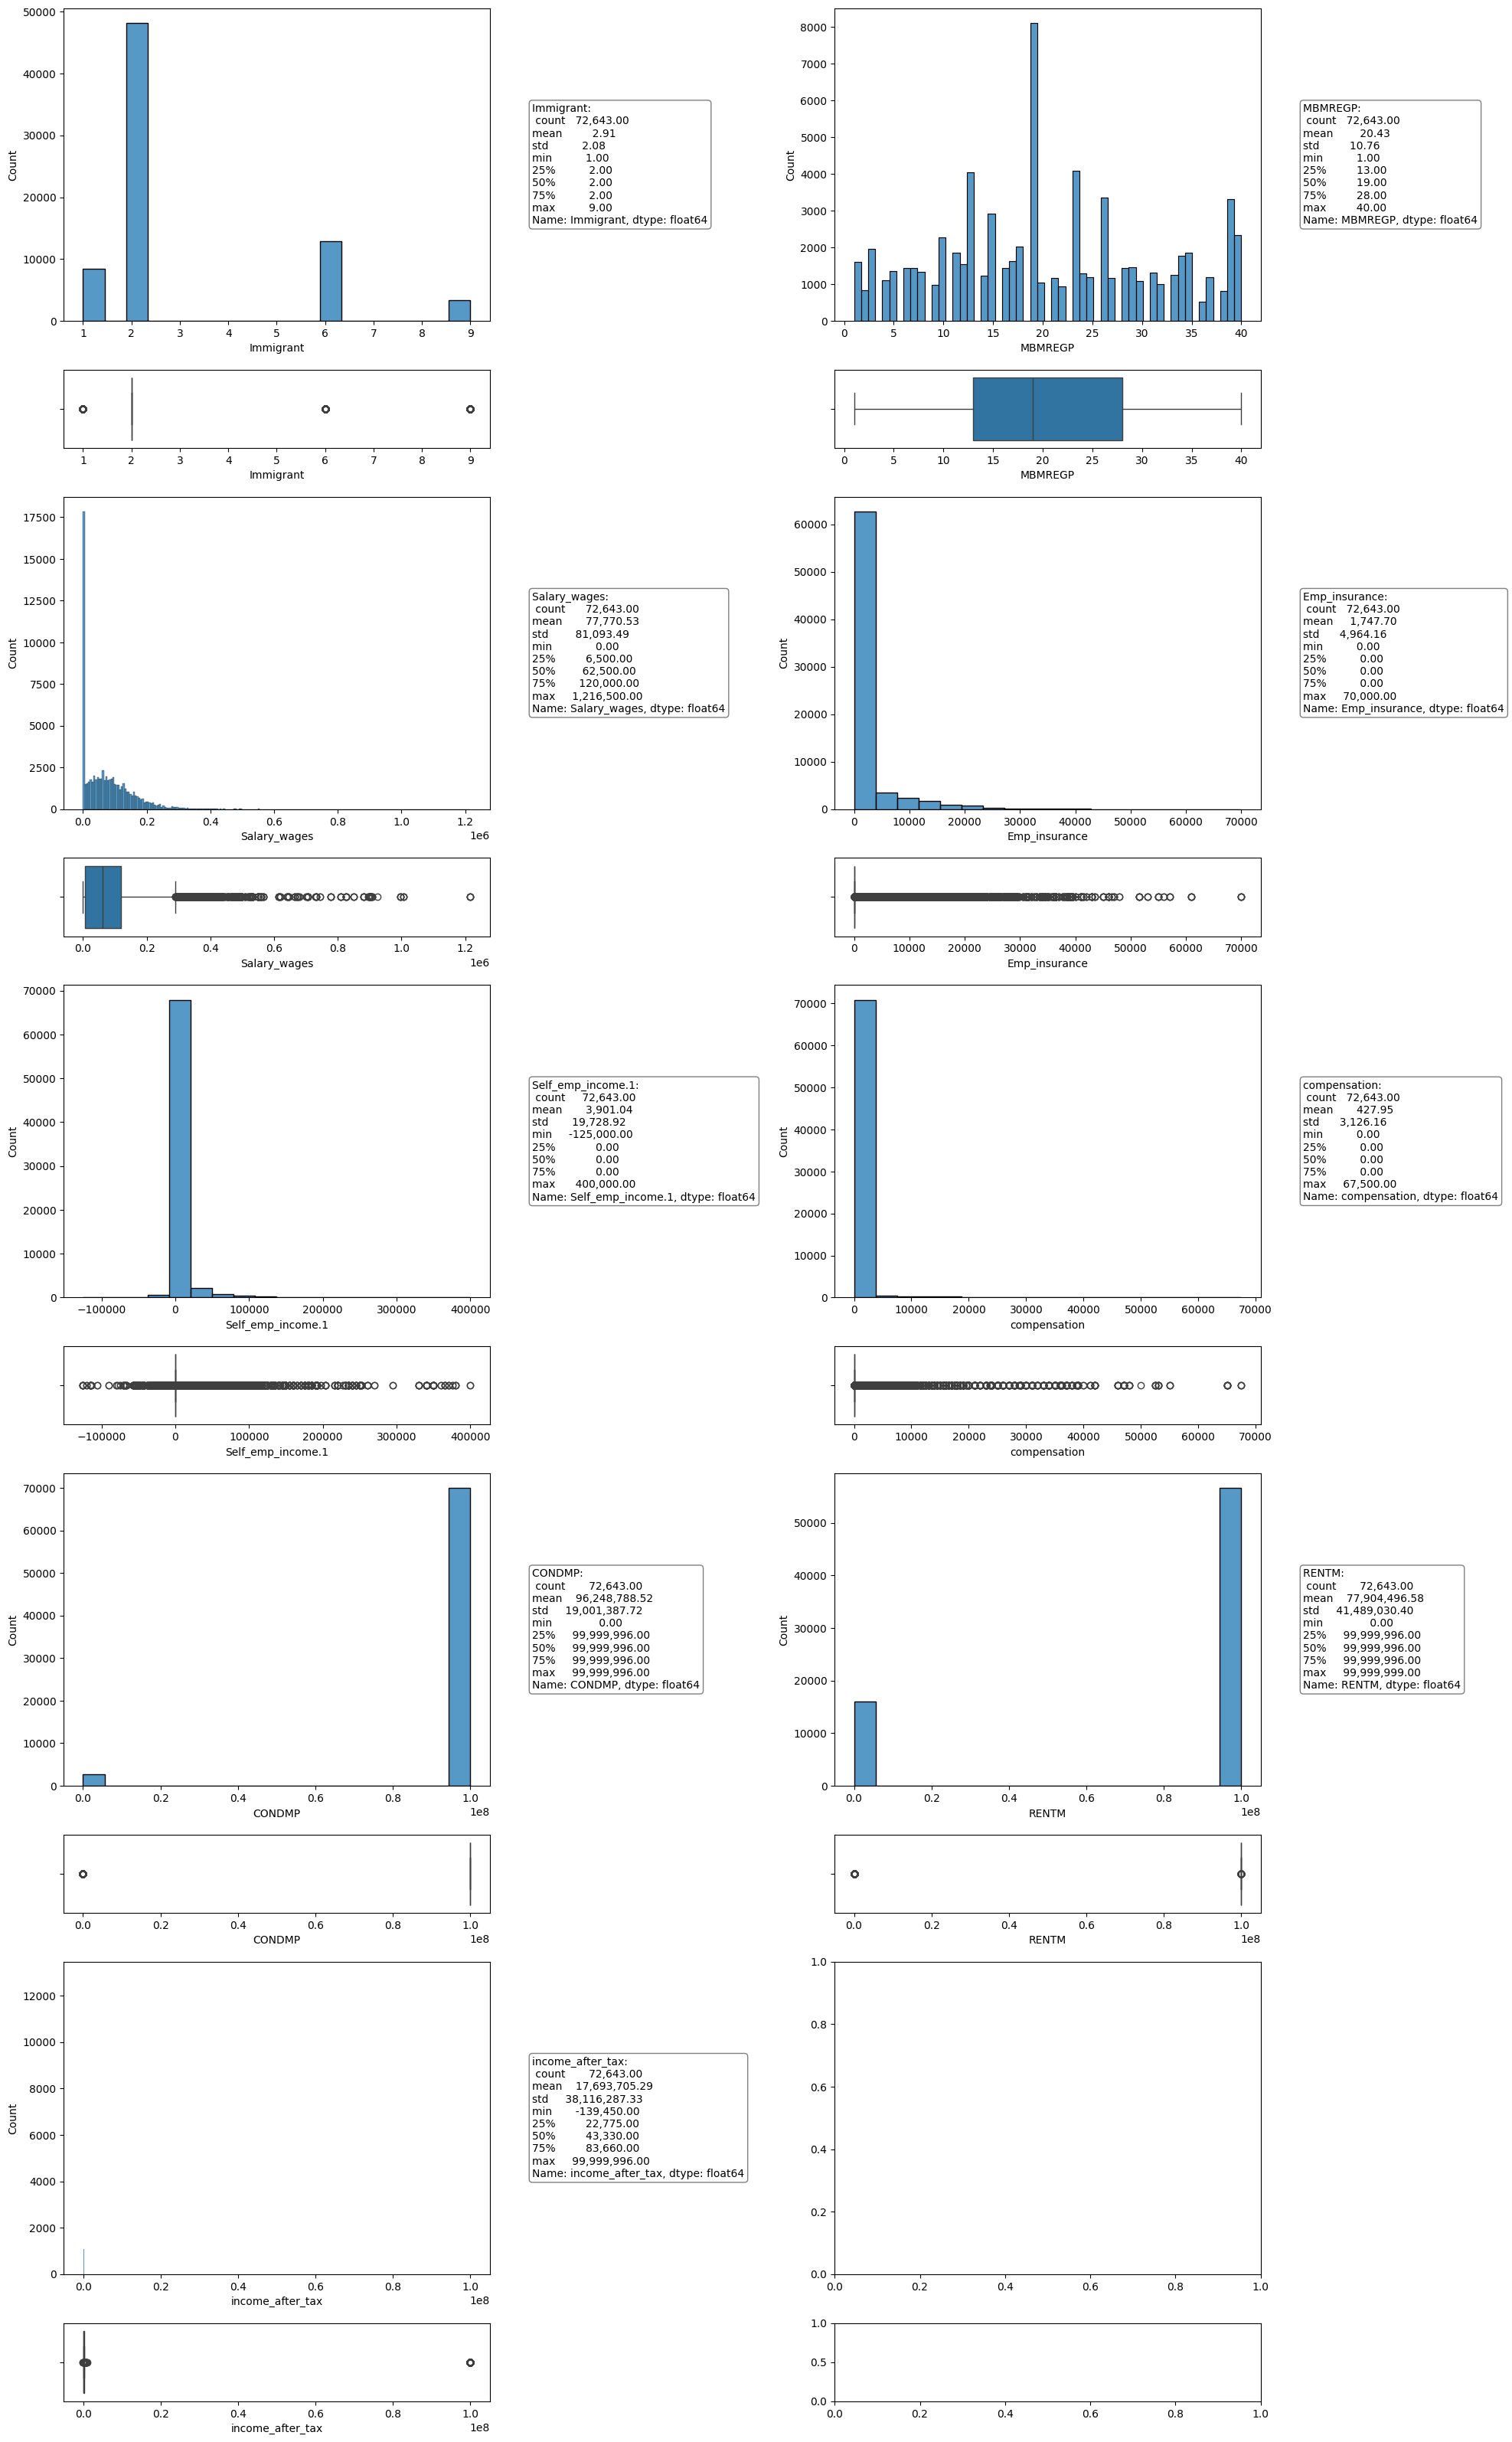

In [222]:
fig, axis = plt.subplots(10, 2, figsize = (20, 32), gridspec_kw={"height_ratios": [8, 2] * 5})

text_data = f"Immigrant: \n {desc_immigrant}"
sns.histplot(ax = axis[0,0], data = data, x = "Immigrant").set(xlabel = "Immigrant")
sns.boxplot(ax = axis[1,0], data = data, x = "Immigrant").set(xlabel = "Immigrant")
axis[0,0].text(1.1, 0.5, text_data, transform = axis[0,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"MBMREGP: \n {desc_MBMREGP}"
sns.histplot(ax = axis[0,1], data = data, x = "MBMREGP").set(xlabel = "MBMREGP")
sns.boxplot(ax = axis[1,1], data = data, x = "MBMREGP").set(xlabel = "MBMREGP")
axis[0,1].text(1.1, 0.5, text_data, transform = axis[0,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Salary_wages: \n {desc_Salary_wages}"
sns.histplot(ax = axis[2,0], data = data, x = "Salary_wages").set(xlabel = "Salary_wages")
sns.boxplot(ax = axis[3,0], data = data, x = "Salary_wages").set(xlabel = "Salary_wages")
axis[2,0].text(1.1, 0.5, text_data, transform = axis[2,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Emp_insurance: \n {desc_Emp_insurance}"
sns.histplot(ax = axis[2,1], data = data, x = "Emp_insurance").set(xlabel = "Emp_insurance")
sns.boxplot(ax = axis[3,1], data = data, x = "Emp_insurance").set(xlabel = "Emp_insurance")
axis[2,1].text(1.1, 0.5, text_data, transform = axis[2,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Self_emp_income.1: \n {desc_Self_emp_income}"
sns.histplot(ax = axis[4,0], data = data, x = "Self_emp_income.1").set(xlabel = "Self_emp_income.1")
sns.boxplot(ax = axis[5,0], data = data, x = "Self_emp_income.1").set(xlabel = "Self_emp_income.1")
axis[4,0].text(1.1, 0.5, text_data, transform = axis[4,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"compensation: \n {desc_compensation}"
sns.histplot(ax = axis[4,1], data = data, x = "compensation").set(xlabel = "compensation")
sns.boxplot(ax = axis[5,1], data = data, x = "compensation").set(xlabel = "compensation")
axis[4,1].text(1.1, 0.5, text_data, transform = axis[4,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"CONDMP: \n {desc_CONDMP}"
sns.histplot(ax = axis[6,0], data = data, x = "CONDMP").set(xlabel = "CONDMP")
sns.boxplot(ax = axis[7,0], data = data, x = "CONDMP").set(xlabel = "CONDMP")
axis[6,0].text(1.1, 0.5, text_data, transform = axis[6,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"RENTM: \n {desc_RENTM}"
sns.histplot(ax = axis[6,1], data = data, x = "RENTM").set(xlabel = "RENTM")
sns.boxplot(ax = axis[7,1], data = data, x = "RENTM").set(xlabel = "RENTM")
axis[6,1].text(1.1, 0.5, text_data, transform = axis[6,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"income_after_tax: \n {desc_income_after_tax}"
sns.histplot(ax = axis[8,0], data = data, x = "income_after_tax").set(xlabel = "income_after_tax")
sns.boxplot(ax = axis[9,0], data = data, x = "income_after_tax").set(xlabel = "income_after_tax")
axis[8,0].text(1.1, 0.5, text_data, transform = axis[8,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

plt.tight_layout()

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/no_applied_outliers.jpg")

plt.show()


- POSSIBLE OUTLIERS

    - Salary_wages -> many extreme outliers, median is 52,000 max is 1.2M
    - Emp_insurance -> Most values near 0, some high outliers
    - Self_emp_income.1 -> High max value compared to Q3
    - compensation -> Heavy skew with few outliers, most of values are near 0
    - CONDNP -> Entry data issues or placeholders
    - RENTM ->  Entry data issues or placeholders
    - income_after_tax -> Entry data issues or placeholders

In [223]:
#
#       Salary_wages
#
Salary_wages_iqr = desc_Salary_wages["75%"] - desc_Salary_wages["25%"]

Salary_wages_upper_limit = desc_Salary_wages["75%"] + 1.5 * Salary_wages_iqr
Salary_wages_lower_limit = desc_Salary_wages["25%"] - 1.5 * Salary_wages_iqr

print(f'Price upper limit: {round(Salary_wages_upper_limit, 2)}')
print(f'Price lower limit: {round(Salary_wages_lower_limit, 2)} \n')

#
#       Salary_wages
#
data['Salary_wages'] = data['Salary_wages'].apply(
    lambda x: min(x, Salary_wages_upper_limit) if x > Salary_wages_upper_limit else x)

Price upper limit: 290250.0
Price lower limit: -163750.0 



In [ ]:
'''#
#       Emp_insurance
#
Emp_insurance_iqr = desc_Emp_insurance["75%"] - desc_Emp_insurance["25%"]

Emp_insurance_upper_limit = desc_Emp_insurance["75%"] + 1.5 * Emp_insurance_iqr
Emp_insurance_lower_limit = desc_Emp_insurance["25%"] - 1.5 * Emp_insurance_iqr

print(f'Price upper limit: {round(Emp_insurance_upper_limit, 2)}')
print(f'Price lower limit: {round(Emp_insurance_lower_limit, 2)} \n')

#
#       Emp_insurance
#
data['Emp_insurance'] = data['Emp_insurance'].apply(
    lambda x: min(x, Emp_insurance_upper_limit) if x > Emp_insurance_upper_limit else x)'''

Price upper limit: 0.0
Price lower limit: 0.0 



In [ ]:
'''#
#       Self_emp_income.1
#
Self_emp_income_iqr = desc_Self_emp_income["75%"] - desc_Self_emp_income["25%"]

Self_emp_income_upper_limit = desc_Self_emp_income["75%"] + 1.5 * Self_emp_income_iqr
Self_emp_income_lower_limit = desc_Self_emp_income["25%"] - 1.5 * Self_emp_income_iqr

print(f'Price upper limit: {round(Self_emp_income_upper_limit, 2)}')
print(f'Price lower limit: {round(Self_emp_income_lower_limit, 2)} \n')

#
#       Self_emp_income.1
#
data['Self_emp_income.1'] = data['Self_emp_income.1'].apply(
    lambda x: min(x, Self_emp_income_upper_limit) if x > Self_emp_income_upper_limit else x)'''

Price upper limit: 0.0
Price lower limit: 0.0 



In [ ]:
'''#
#       Compensation
#
Compensation_iqr = desc_compensation["75%"] - desc_compensation["25%"]

Compensation_upper_limit = desc_compensation["75%"] + 1.5 * Compensation_iqr
Compensation_lower_limit = desc_compensation["25%"] - 1.5 * Compensation_iqr

print(f'Price upper limit: {round(Compensation_upper_limit, 2)}')
print(f'Price lower limit: {round(Compensation_lower_limit, 2)} \n')

#
#       Compensation
#
data['compensation'] = data['compensation'].apply(
    lambda x: min(x, Compensation_upper_limit) if x > Compensation_upper_limit else x)'''

Price upper limit: 0.0
Price lower limit: 0.0 



In [227]:
#
#       CONDMP
#
CONDNP_iqr = desc_CONDMP["75%"] - desc_CONDMP["25%"]

CONDNP_upper_limit = desc_CONDMP["75%"] + 1.5 * CONDNP_iqr
CONDNP_lower_limit = desc_CONDMP["25%"] - 1.5 * CONDNP_iqr

print(f'Price upper limit: {round(CONDNP_upper_limit, 2)}')
print(f'Price lower limit: {round(CONDNP_lower_limit, 2)} \n')

#
#       CONDMP
#
data['CONDMP'] = data['CONDMP'].apply(
    lambda x: min(x, CONDNP_upper_limit) if x > CONDNP_upper_limit else x)

Price upper limit: 99999996.0
Price lower limit: 99999996.0 



In [228]:
#
#       RENTM
#
RENTM_iqr = desc_RENTM["75%"] - desc_RENTM["25%"]

RENTM_upper_limit = desc_RENTM["75%"] + 1.5 * RENTM_iqr
RENTM_lower_limit = desc_RENTM["25%"] - 1.5 * RENTM_iqr

print(f'Price upper limit: {round(RENTM_upper_limit, 2)}')
print(f'Price lower limit: {round(RENTM_lower_limit, 2)} \n')

#
#       RENTM
#
data['RENTM'] = data['RENTM'].apply(
    lambda x: min(x, RENTM_upper_limit) if x > RENTM_upper_limit else x)

Price upper limit: 99999996.0
Price lower limit: 99999996.0 



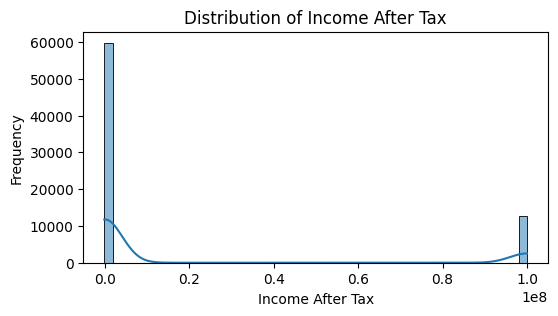

In [229]:

plt.figure(figsize=(6, 3))
sns.histplot(data['income_after_tax'], bins=50, kde=True)
plt.title("Distribution of Income After Tax")
plt.xlabel("Income After Tax")
plt.ylabel("Frequency")
plt.show()

c:\Users\fgdel\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


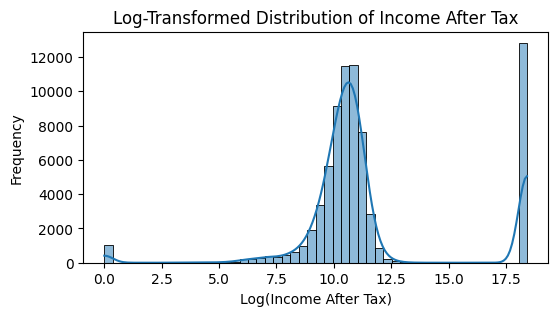

In [230]:
data['income_after_tax_log'] = np.log1p(data['income_after_tax'])  # log1p prevents log(0) errors

# Replot the histogram with transformed data
plt.figure(figsize=(6, 3))
sns.histplot(data['income_after_tax_log'], bins=50, kde=True)
plt.title("Log-Transformed Distribution of Income After Tax")
plt.xlabel("Log(Income After Tax)")
plt.ylabel("Frequency")
plt.show()

In [231]:
#
#       income_after_tax
#
income_after_tax_iqr = desc_income_after_tax["75%"] - desc_income_after_tax["25%"]

income_after_tax_upper_limit = desc_income_after_tax["75%"] + 1.5 * income_after_tax_iqr
income_after_tax_lower_limit = desc_income_after_tax["25%"] - 1.5 * income_after_tax_iqr

print(f'Price upper limit: {round(income_after_tax_upper_limit, 2)}')
print(f'Price lower limit: {round(income_after_tax_lower_limit, 2)} \n')

#
#       income_after_tax
#
data['income_after_tax'] = data['income_after_tax'].apply(
    lambda x: min(x, income_after_tax_upper_limit) if x > income_after_tax_upper_limit else x)

Price upper limit: 174987.5
Price lower limit: -68552.5 



In [232]:
desc_Salary_wages_2 = data["Salary_wages"].describe()
print(f"Dato de la variable: \n {desc_Salary_wages_2} \n")

desc_Emp_insurance_2 = data["Emp_insurance"].describe()
print(f"Dato de la variable: \n {desc_Emp_insurance_2} \n")

desc_Self_emp_income_2 = data["Self_emp_income.1"].describe()
print(f"Dato de la variable: \n {desc_Self_emp_income_2} \n")

desc_compensation_2 = data["compensation"].describe()
print(f"Dato de la variable: \n {desc_compensation_2} \n")

desc_CONDNP_2 = data["CONDMP"].describe()
print(f"Dato de la variable: \n {desc_CONDNP_2} \n")

desc_RENTM_2 = data["RENTM"].describe()
print(f"Dato de la variable: \n {desc_RENTM_2} \n")

desc_income_after_tax_2 = data["income_after_tax"].describe()
print(f"Dato de la variable: \n {desc_income_after_tax_2} \n")


Dato de la variable: 
 count    72,643.00
mean     75,955.87
std      72,613.96
min           0.00
25%       6,500.00
50%      62,500.00
75%     120,000.00
max     290,250.00
Name: Salary_wages, dtype: float64 

Dato de la variable: 
 count   72,643.00
mean         0.00
std          0.00
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          0.00
Name: Emp_insurance, dtype: float64 

Dato de la variable: 
 count     72,643.00
mean        -309.66
std        3,225.98
min     -125,000.00
25%            0.00
50%            0.00
75%            0.00
max            0.00
Name: Self_emp_income.1, dtype: float64 

Dato de la variable: 
 count   72,643.00
mean         0.00
std          0.00
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          0.00
Name: compensation, dtype: float64 

Dato de la variable: 
 count       72,643.00
mean    96,248,788.52
std     19,001,387.72
min              0.00
25%     99,999,996.00
50%     99,999,996.00

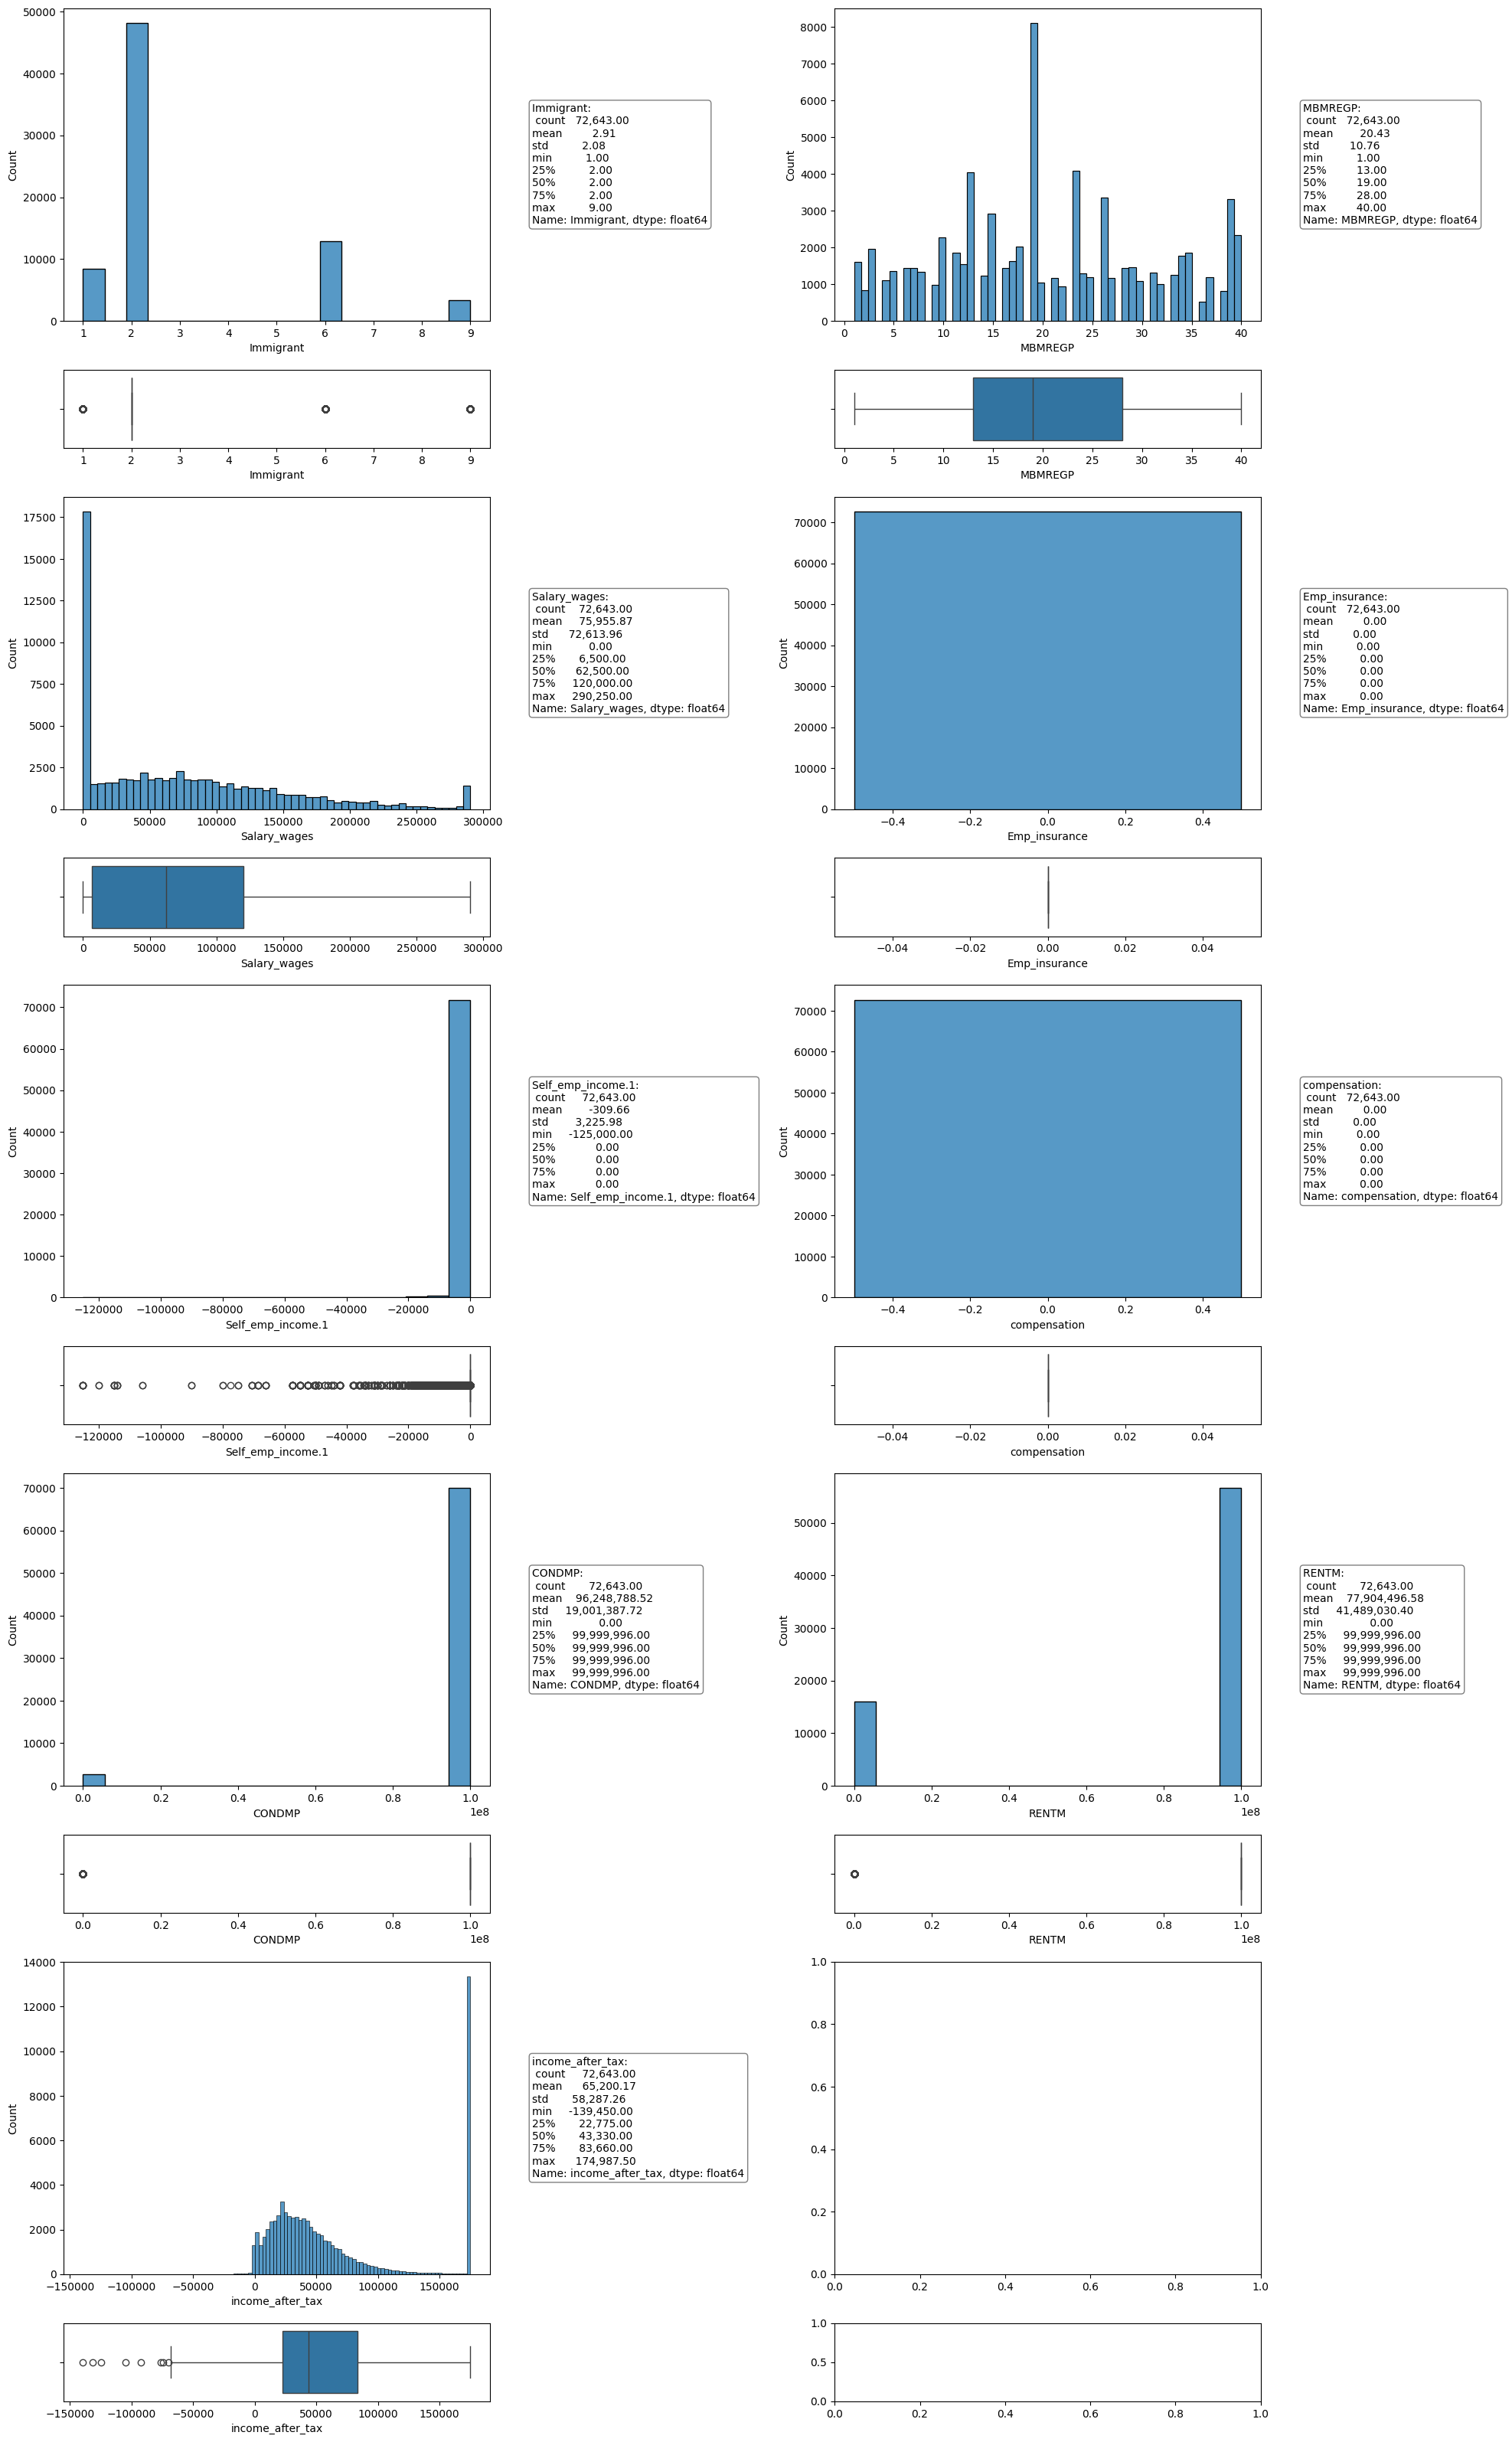

In [233]:
fig, axis = plt.subplots(10, 2, figsize = (20, 32), gridspec_kw={"height_ratios": [8, 2] * 5})

text_data = f"Immigrant: \n {desc_immigrant}"
sns.histplot(ax = axis[0,0], data = data, x = "Immigrant").set(xlabel = "Immigrant")
sns.boxplot(ax = axis[1,0], data = data, x = "Immigrant").set(xlabel = "Immigrant")
axis[0,0].text(1.1, 0.5, text_data, transform = axis[0,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"MBMREGP: \n {desc_MBMREGP}"
sns.histplot(ax = axis[0,1], data = data, x = "MBMREGP").set(xlabel = "MBMREGP")
sns.boxplot(ax = axis[1,1], data = data, x = "MBMREGP").set(xlabel = "MBMREGP")
axis[0,1].text(1.1, 0.5, text_data, transform = axis[0,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Salary_wages: \n {desc_Salary_wages_2}"
sns.histplot(ax = axis[2,0], data = data, x = "Salary_wages").set(xlabel = "Salary_wages")
sns.boxplot(ax = axis[3,0], data = data, x = "Salary_wages").set(xlabel = "Salary_wages")
axis[2,0].text(1.1, 0.5, text_data, transform = axis[2,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Emp_insurance: \n {desc_Emp_insurance_2}"
sns.histplot(ax = axis[2,1], data = data, x = "Emp_insurance").set(xlabel = "Emp_insurance")
sns.boxplot(ax = axis[3,1], data = data, x = "Emp_insurance").set(xlabel = "Emp_insurance")
axis[2,1].text(1.1, 0.5, text_data, transform = axis[2,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Self_emp_income.1: \n {desc_Self_emp_income_2}"
sns.histplot(ax = axis[4,0], data = data, x = "Self_emp_income.1").set(xlabel = "Self_emp_income.1")
sns.boxplot(ax = axis[5,0], data = data, x = "Self_emp_income.1").set(xlabel = "Self_emp_income.1")
axis[4,0].text(1.1, 0.5, text_data, transform = axis[4,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"compensation: \n {desc_compensation_2}"
sns.histplot(ax = axis[4,1], data = data, x = "compensation").set(xlabel = "compensation")
sns.boxplot(ax = axis[5,1], data = data, x = "compensation").set(xlabel = "compensation")
axis[4,1].text(1.1, 0.5, text_data, transform = axis[4,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"CONDMP: \n {desc_CONDNP_2}"
sns.histplot(ax = axis[6,0], data = data, x = "CONDMP").set(xlabel = "CONDMP")
sns.boxplot(ax = axis[7,0], data = data, x = "CONDMP").set(xlabel = "CONDMP")
axis[6,0].text(1.1, 0.5, text_data, transform = axis[6,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"RENTM: \n {desc_RENTM_2}"
sns.histplot(ax = axis[6,1], data = data, x = "RENTM").set(xlabel = "RENTM")
sns.boxplot(ax = axis[7,1], data = data, x = "RENTM").set(xlabel = "RENTM")
axis[6,1].text(1.1, 0.5, text_data, transform = axis[6,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"income_after_tax: \n {desc_income_after_tax_2}"
sns.histplot(ax = axis[8,0], data = data, x = "income_after_tax").set(xlabel = "income_after_tax")
sns.boxplot(ax = axis[9,0], data = data, x = "income_after_tax").set(xlabel = "income_after_tax")
axis[8,0].text(1.1, 0.5, text_data, transform = axis[8,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

plt.tight_layout()

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/applied_outliers.jpg")

plt.show()


In [234]:
columns_to_drop = ["income_after_tax_log"]

data.drop(columns_to_drop, axis = 1, inplace = True)
data.head()

,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Immigrant,income_after_tax,Self_emp_income.1,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,38,15,2,3,1,3,2,2,"20,275.00",0.00,0.00,0.00,0.00,1,1,99999996,"99,999,996.00"
1,17,9,1,1,1,2,1,2,"61,680.00",0.00,0.00,"106,000.00",0.00,4,4,99999996,"99,999,996.00"
2,17,9,2,1,1,3,1,2,"26,875.00",0.00,0.00,"106,000.00",0.00,4,4,99999996,"99,999,996.00"
3,17,4,1,4,2,1,1,2,"14,000.00",0.00,0.00,"106,000.00",0.00,4,4,99999996,"99,999,996.00"
4,17,3,1,96,6,6,6,6,"174,987.50",0.00,0.00,"106,000.00",0.00,4,4,99999996,"99,999,996.00"


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MBMREGP            72643 non-null  int64  
 1   Age_gap            72643 non-null  int64  
 2   Gender             72643 non-null  int64  
 3   Marital_status     72643 non-null  int64  
 4   Highschool         72643 non-null  int64  
 5   Highest_edu        72643 non-null  int64  
 6   Work_ref           72643 non-null  int64  
 7   Immigrant          72643 non-null  int64  
 8   income_after_tax   72643 non-null  float64
 9   Self_emp_income.1  72643 non-null  float64
 10  Emp_insurance      72643 non-null  float64
 11  Salary_wages       72643 non-null  float64
 12  compensation       72643 non-null  float64
 13  Family_mem         72643 non-null  int64  
 14  CFCOMP             72643 non-null  int64  
 15  CONDMP             72643 non-null  int64  
 16  RENTM              726

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop(columns=['income_after_tax'])  # Replace 'Target_Variable' with your actual target
y = data['income_after_tax']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
from sklearn.linear_model import LinearRegression
# Train the logistic regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [240]:
from sklearn.metrics import classification_report, r2_score, mean_absolute_error
# Predictions
y_pred = linreg.predict(X_test_scaled)

# Model Evaluation
print("R2:", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))


R2: 0.7793462196643155
MAE 20385.15829968389
